In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

(880, 587)


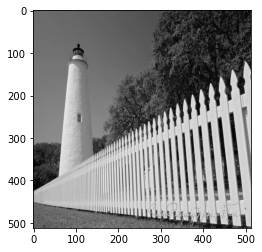

In [3]:
from PIL import Image, ImageOps

img = Image.open("Lighthouse.JPG")
print(img.size)
img = img.resize((512, 512), Image.ANTIALIAS)
img = ImageOps.grayscale(img)
img = np.array(img)
plt.imshow(img, cmap="gray")

In [75]:
def inv_rot(p, rot):
    #M = np.array([
    #    [math.cos(-rot), 0, -math.sin(-rot), math.sin(-rot)],
    #    [0, 1 ,0, 0],
    #    [math.sin(-rot), 0, math.cos(-rot), -math.cos(-rot) + 1],
    #    [0, 0, 0, 1]
    #])
    M = np.array([
        [math.cos(rot), 0, math.sin(rot), 0],
        [0, 1, 0, 0],
        [-math.sin(rot), 0, math.cos(rot), 0],
        [math.sin(rot), 0, -math.cos(rot), 1]
    ])
    
    return M @ p

def screen_transform(p, rot):
    ones = np.ones((p.shape[0], 2))
    p = np.hstack((p, ones))
    
    p = np.transpose(p)
    p = inv_rot(p, rot)
    p = np.transpose(p)

    print("3D", p, p[:,:2], p[:,2])
    p = p[:,:2] / np.transpose([p[:, 2]])
    
    return p

In [76]:
p = np.transpose([[-1, -1, 1, 1]])
print(inv_rot(p, math.pi / 4))

[[ 0.        ]
 [-1.        ]
 [ 1.41421356]
 [-0.41421356]]


In [74]:
p = np.array([[-1.5, -1.5], [1, 1]])
print(screen_transform(p, math.pi/4))

3D [[-1.06066017 -1.5         2.06066017  1.        ]
 [ 0.70710678  1.          0.29289322  1.        ]] [[-1.06066017 -1.5       ]
 [ 0.70710678  1.        ]] [2.06066017 0.29289322]
[[-0.51471863 -0.72792206]
 [ 2.41421356  3.41421356]]


In [58]:
from tqdm.notebook import tqdm

def sample(x, y):
    h, w = img.shape
    x += 0.5
    y += 0.5
    if x < 0 or y < 0 or x >= 1 or y >= 1:
        return 0
    return img[math.floor(h * y), math.floor(w * x)]


def render(rot):
    vals = np.linspace(-1.5, 1.5, 512)
    new_img = np.zeros((len(vals), len(vals)))
    for i in tqdm(range(len(vals))):
        for j in range(len(vals)):
            y = vals[i]
            x = vals[j]
            p = screen_transform(np.array([[x, y]]), rot)
            new_img[i, j] = sample(p[0, 0], p[0, 1])
    return new_img

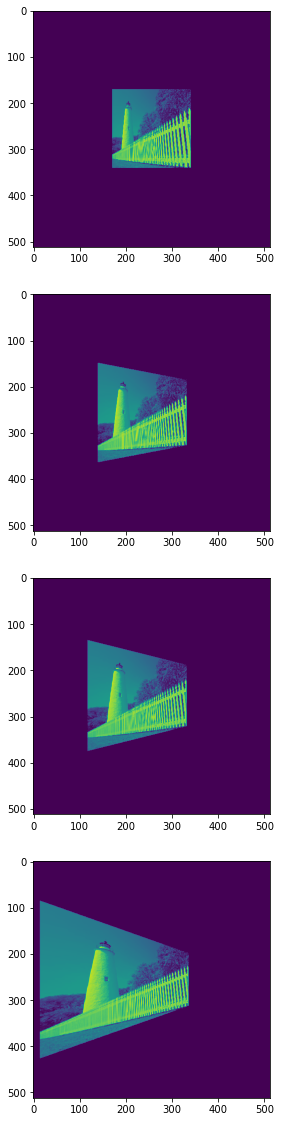

In [61]:
fig, axs = plt.subplots(4, 1, figsize=(10, 20))
axs[0].imshow(render(0))
axs[1].imshow(render(math.pi / 8))
axs[2].imshow(render(math.pi / 6))
axs[3].imshow(render(math.pi / 4))